# **Air quality in CDMX**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# Data loading and cleaning
# =========================

# Load data
df = pd.read_csv("air_data_CDMX.csv")

# First visualization
print(df.head())
print(df.info())

   location_id location_name parameter  value unit           datetimeUtc  \
0        10748        Merced        co    1.1  ppm  2025-03-10T17:00:00Z   
1        10748        Merced        co    1.1  ppm  2025-03-10T18:00:00Z   
2        10748        Merced        co    0.8  ppm  2025-03-10T20:00:00Z   
3        10748        Merced        co    1.0  ppm  2025-03-10T21:00:00Z   
4        10748        Merced        co    0.6  ppm  2025-03-10T22:00:00Z   

               datetimeLocal             timezone   latitude  longitude  \
0  2025-03-10T11:00:00-06:00  America/Mexico_City  19.424722 -99.119722   
1  2025-03-10T12:00:00-06:00  America/Mexico_City  19.424722 -99.119722   
2  2025-03-10T14:00:00-06:00  America/Mexico_City  19.424722 -99.119722   
3  2025-03-10T15:00:00-06:00  America/Mexico_City  19.424722 -99.119722   
4  2025-03-10T16:00:00-06:00  America/Mexico_City  19.424722 -99.119722   

   country_iso  isMobile  isMonitor                         owner_name  \
0          NaN    

In [ ]:
# Dropping unnecessary columns
df = df.drop(columns=["location_name", "location_id", "datetimeLocal", "timezone",
                      "latitude", "longitude", "country_iso", "isMobile",
                      "isMonitor", "owner_name", "provider"])

# Converting to datetime format
df["datetimeUtc"] = pd.to_datetime(df["datetimeUtc"])

# Checking for null values in the dataframe
print(df["parameter"].value_counts())
print(df.isnull().sum())

parameter
co      680
so2     675
nox     660
no      660
no2     659
o3      659
pm10    659
pm25    658
Name: count, dtype: int64
parameter      0
value          0
unit           0
datetimeUtc    0
dtype: int64


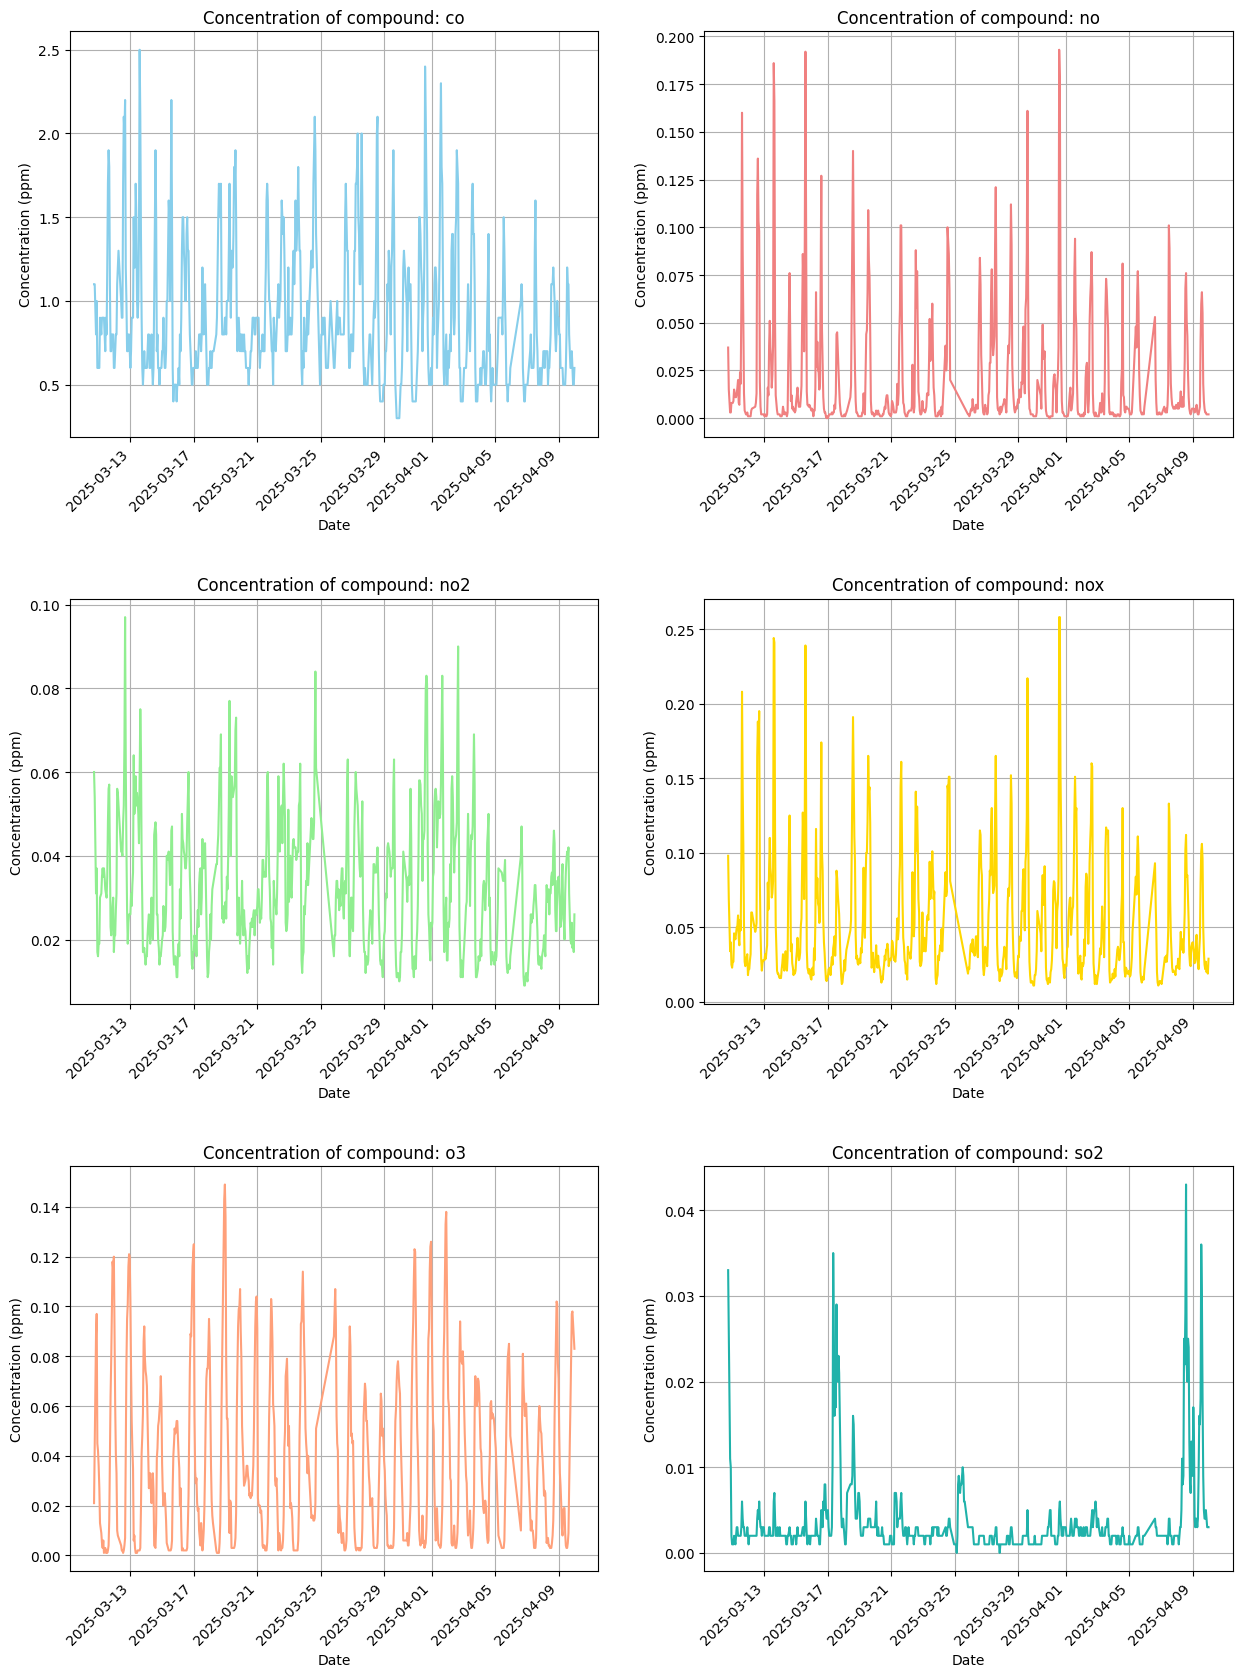

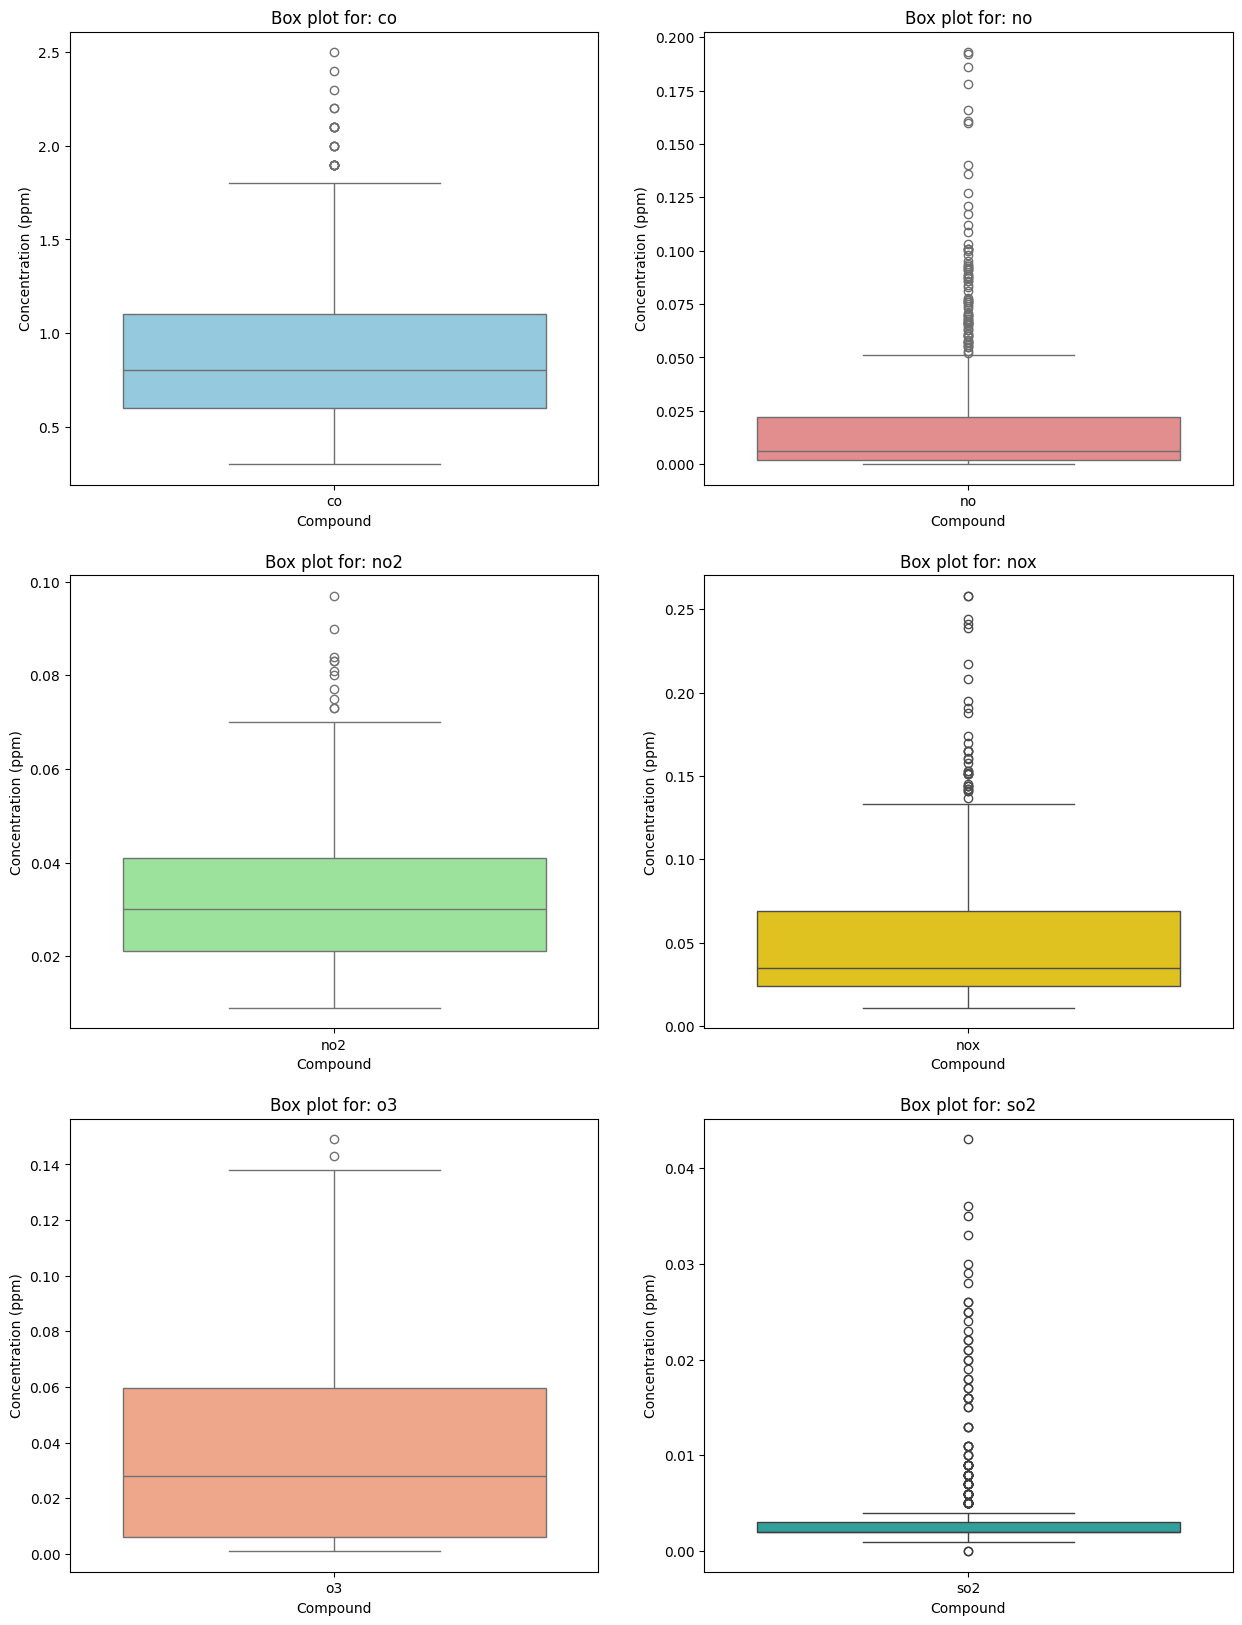

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
co,680.0,0.897500,0.396089,0.300,0.600,0.800,1.1000,2.500
no,660.0,0.019479,0.030324,0.000,0.002,0.006,0.0220,0.193
no2,659.0,0.032467,0.015101,0.009,0.021,0.030,0.0410,0.097
nox,660.0,0.051933,0.041194,0.011,0.024,0.035,0.0690,0.258
o3,659.0,0.036974,0.033747,0.001,0.006,0.028,0.0595,0.149
so2,675.0,0.003606,0.004841,0.000,0.002,0.002,0.0030,0.043


In [ ]:
# =================
# Gas visualization
# =================

# Filtering gas compounds
df_gas = df[df["parameter"].isin(["co", "so2", "nox", "no", "no2", "o3"])]
plt.figure(figsize=(15, 20))
colors = ["skyblue", "lightcoral", "lightgreen", "gold",
          "lightsalmon", "lightseagreen"]

# Line plots of concentration over time
for i in range(len(df_gas["parameter"].unique())):
    plt.subplot(3, 2, (i + 1))
    df_aux = df_gas[df_gas["parameter"].isin([df_gas["parameter"].unique()[i]])]
    sns.lineplot(data=df_aux, x="datetimeUtc", y="value", color=colors[i])
    plt.title(f"Concentration of compound: {df_gas['parameter'].unique()[i]}")
    plt.xlabel("Date")
    plt.xticks(rotation=45, ha="right")
    x_label = plt.gca()
    x_label.tick_params(axis="x", labelsize=10)
    plt.ylabel("Concentration (ppm)")
    plt.subplots_adjust(hspace=0.4)
    plt.grid()

plt.show()

# Box plots for gas compounds
plt.figure(figsize=(15, 20))

for i in range(len(df_gas["parameter"].unique())):
    plt.subplot(3, 2, (i + 1))
    df_aux = df_gas[df_gas["parameter"].isin([df_gas["parameter"].unique()[i]])]
    sns.boxplot(data=df_aux, x="parameter", y="value", color=colors[i])
    plt.title(f"Box plot for: {df_gas['parameter'].unique()[i]}")
    plt.xlabel("Compound")
    plt.ylabel("Concentration (ppm)")

plt.show()

# Statistical summary for gases
df_gas.groupby("parameter")["value"].describe()

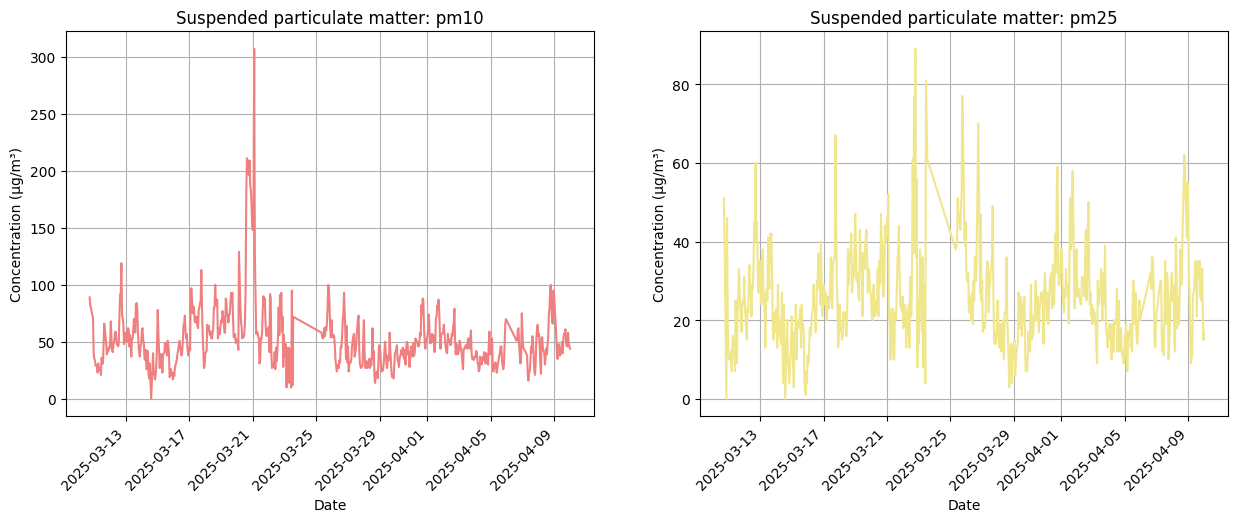

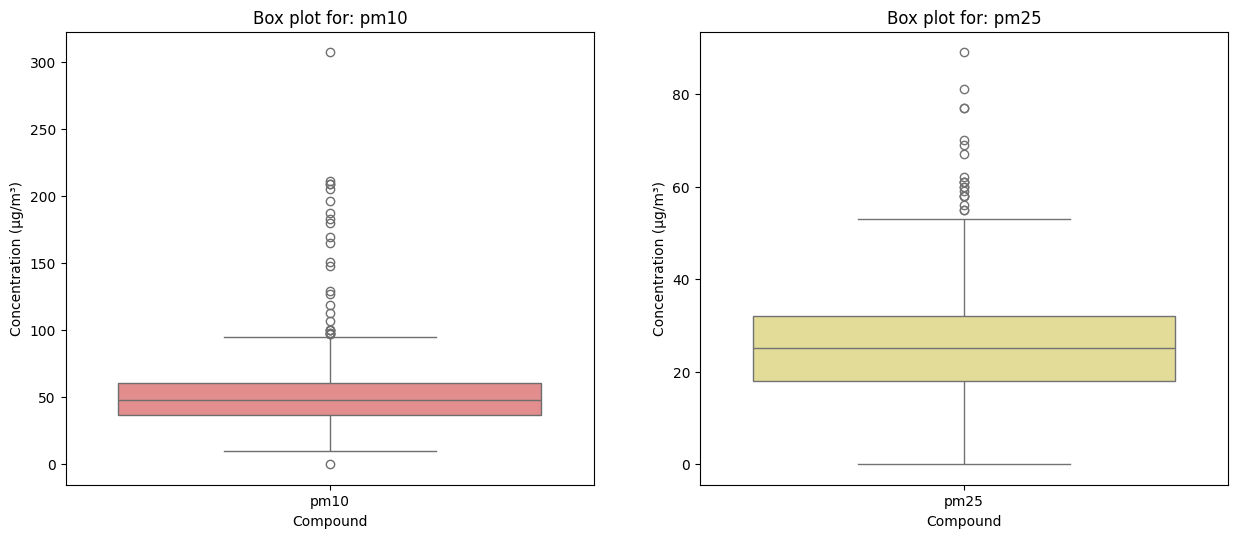

,count,mean,std,min,25%,50%,75%,max
parameter,,,,,,,,
pm10,659.0,52.552352,28.268818,0.0,37.0,48.0,60.5,307.0
pm25,658.0,26.057751,12.302244,0.0,18.0,25.0,32.0,89.0


In [ ]:
# =============================================
# Visualization of suspended particulate matter
# =============================================

df_sp = df[df["parameter"].isin(["pm10", "pm25"])]
plt.figure(figsize=(15, 20))
colors = ["lightcoral", "khaki"]

for i in range(len(df_sp["parameter"].unique())):
    plt.subplot(3, 2, (i + 1))
    df_aux = df_sp[df_sp["parameter"].isin([df_sp["parameter"].unique()[i]])]
    sns.lineplot(data=df_aux, x="datetimeUtc", y="value", color=colors[i])
    plt.title(f"Suspended particulate matter: {df_sp['parameter'].unique()[i]}")
    plt.xlabel("Date")
    plt.xticks(rotation=45, ha="right")
    x_label = plt.gca()
    x_label.tick_params(axis="x", labelsize=10)
    plt.ylabel("Concentration (µg/m³)")
    plt.subplots_adjust(hspace=0.5)
    plt.grid()

plt.savefig("figure_example.png")
plt.show()

# Box plots for suspended particulate matter
plt.figure(figsize=(15, 20))

for i in range(len(df_sp["parameter"].unique())):
    plt.subplot(3, 2, (i + 1))
    df_aux = df_sp[df_sp["parameter"].isin([df_sp["parameter"].unique()[i]])]
    sns.boxplot(data=df_aux, x="parameter", y="value", color=colors[i])
    plt.title(f"Box plot for: {df_sp['parameter'].unique()[i]}")
    plt.xlabel("Compound")
    plt.ylabel("Concentration (µg/m³)")

plt.show()

# Statistical summary for particulate matter
df_sp.groupby("parameter")["value"].describe()

## Preliminary Conclusions

- The compound with the highest presence in the air is carbon monoxide.
- The dataframe did not contain null values; however, there were outliers detected for nitrogen oxides (NOx), sulfur dioxide (SO₂), and in both cases of suspended particulate matter.
- PM2.5 particles showed greater variability than PM10 particles. This occurs because PM2.5 particles are a subgroup of PM10.
- This analysis focused on one month of data for the *La Merced* area in Mexico City (CDMX).